[ 0  1  1 -1]
[-1  0  1 -1]
[-1 -1  0  2]
[ 1  1 -2  0]


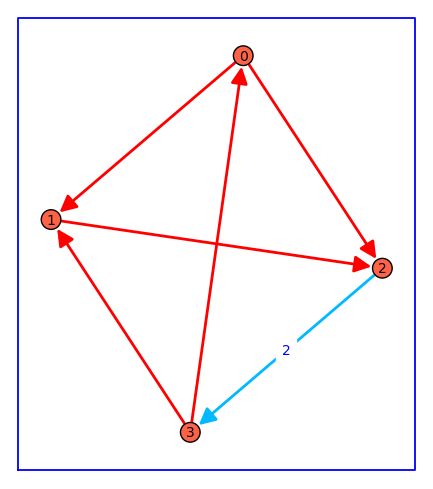

[ 0  1  1 -1| 1  0  0  0]
[-1  0  1 -1| 0  1  0  0]
[-1 -1  0  2| 0  0  1  0]
[ 1  1 -2  0| 0  0  0  1]
[ 0  1  1 -1| 1  0  0  0]
[-1  0  1 -1| 0  1  0  0]
[-1 -1  0  2| 0  0  1  0]
[ 1  1 -2  0| 0  0  0  1]


/tmp/ipykernel_493/919864542.py:13:
********************************************************************************
Having frozen nodes is known to produce wrong answers
This issue is being tracked at https://trac.sagemath.org/sage_trac/ticket/22381.
********************************************************************************


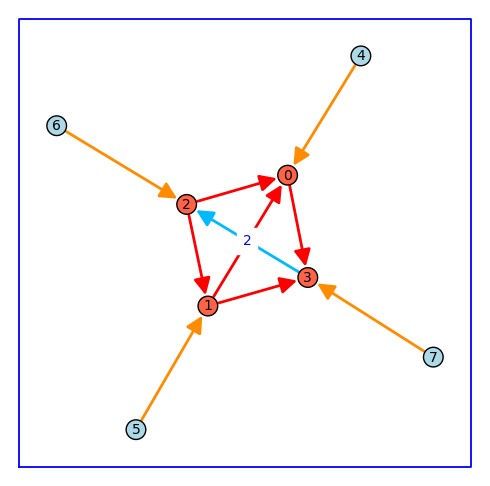

[ 0 -1 -1  1|-1  0  0  0]
[ 1  0  1 -2| 0  1  0  0]
[ 1 -1  0  1| 0  0  1  0]
[-1  2 -1  0| 1  0  0  1]


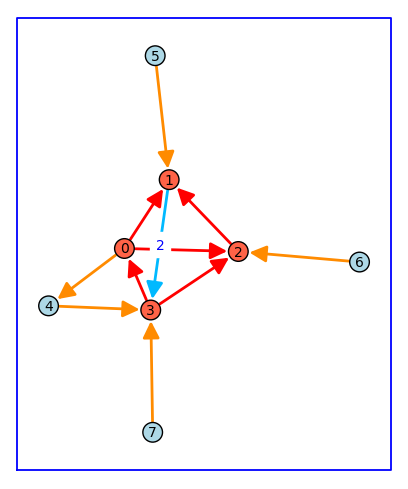

[ 0 -2  1  1|-1  0  0  0]
[ 2  0 -1 -1| 0  1  1  0]
[-1  1  0 -1| 0  0 -1  0]
[-1  1  1  0| 1  0  0  1]


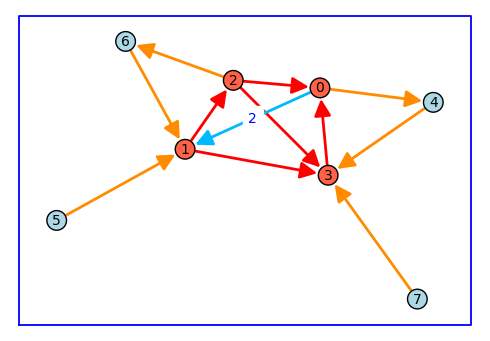

[ 0 -1  2 -1| 0  0  0  1]
[ 1  0 -1  1| 0  1  1  0]
[-2  1  0  1| 0  0 -1  0]
[ 1 -1 -1  0|-1  0  0 -1]


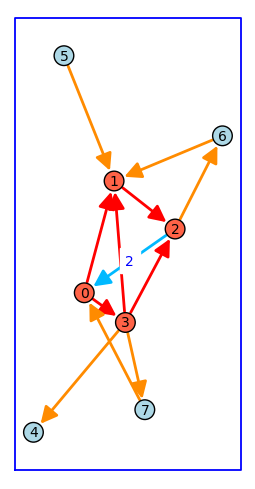

[ 0  1  1 -1| 0  0  0  1]
[-1  0  1 -1| 0 -1 -1  0]
[-1 -1  0  2| 0  1  0  0]
[ 1  1 -2  0|-1  0  0 -1]


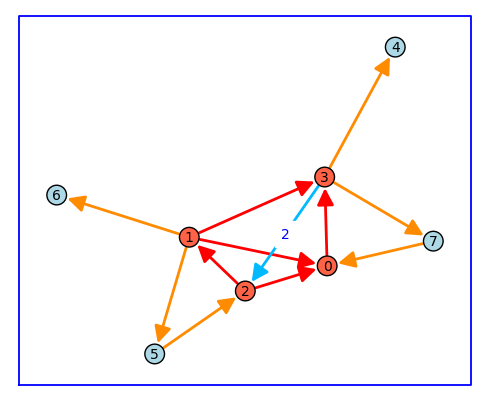

[ 0 -1 -1  1| 0  0  0 -1]
[ 1  0  1 -2| 0 -1 -1  0]
[ 1 -1  0  1| 0  1  0  0]
[-1  2 -1  0|-1  0  0  0]


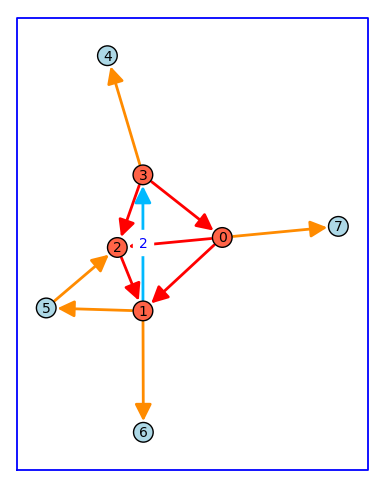

[ 0 -2  1  1| 0  0  0 -1]
[ 2  0 -1 -1| 0  0 -1  0]
[-1  1  0 -1| 0 -1  0  0]
[-1  1  1  0|-1  0  0  0]


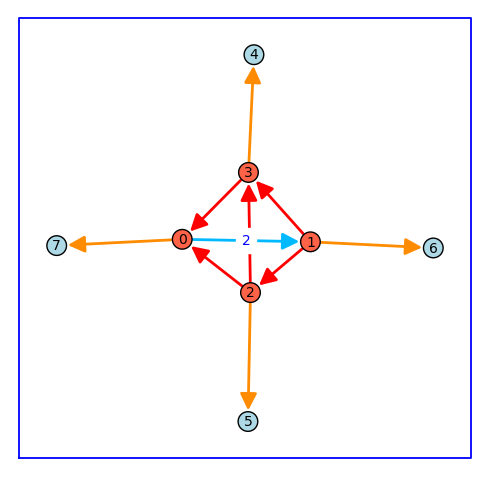

2
3
4


5
6
7


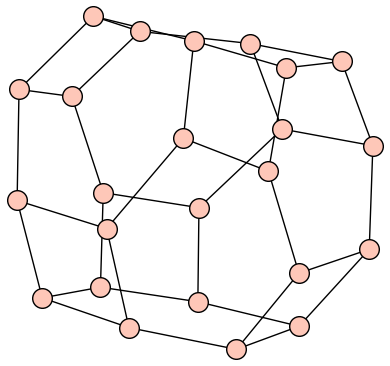

In [1]:
load("quivers.sage")
X = matrix(([0, 1, 1, -1], [-1, 0 ,1 , -1], [-1, -1, 0, 2], [1, 1, -2, 0])); print(X)
Q = ClusterQuiver(X); Q.show()
#X = matrix(([0,3,3], [-3,0,2],[-3,-2,0])); print(X)
w = [1,3,4,2,1,3]
C = identity_matrix(4)
M = block_matrix([[X,C]]); print(M)

for i in [0..6]:
    u = w[:i]
    MPrime = mMutation(M,u)
    print(MPrime)
    Q = ClusterQuiver(MPrime.transpose()); Q.show()
    

G = forklessMutationGraph(X,7)
G.show(vertex_labels=false)

In [0]:
def countCompleteAcylic(n):
    r'''
    Counts the number of acyclic quivers with one arrow between each pair of vertices on n vertices
    
    Input:
    - "n" -- the number of vertices of the quiver;
    
    Output:
    - "count" -- the number of acyclic quivers with one arrow between each pair of vertices on n vertices;
    '''
    
    M = zero_matrix(n)
    for i in [0..n-1]:
        for j in [0..n-1]:
            if i < j:
                M[i,j] = 1;
            elif i > j:
                M[i,j] = -1;
            else:
                continue
                
    Q = ClusterQuiver(M)
    count = 0
    
    for i in [1..(n^2-3n+2)/2]:
        if Q.is_acyclic():
            count++
        
        for j in [0..n-1]:
            for k in [0..n-1]:
                
                M[j,k]